In [1]:
import pandas as pd

# Read the CSV file
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")

# Drop non-beneficial ID columns
application_df = application_df.drop(columns=['EIN', 'NAME'])

# Encode categorical variables using one-hot encoding
application_df = pd.get_dummies(application_df)

# Split the data into features (X) and target (y)
y = application_df["IS_SUCCESSFUL"]
X = application_df.drop(columns=["IS_SUCCESSFUL"])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential([
    Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=8, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Display the model summary
model.summary()

c:\Users\jeong\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         7,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,241 (40.00 KB)

 Trainable params: 10,241 (40.00 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Compile the model
model.compile(optimizer='adam', 
                     loss='binary_crossentropy', 
                     metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, 
                           epochs=100, 
                           batch_size=64, 
                           validation_data=(X_test_scaled, y_test),
                           verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {loss}, Accuracy: {accuracy}")


Epoch 1/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 0.6759 - loss: 0.6162 - val_accuracy: 0.7195 - val_loss: 0.5600
Epoch 2/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.7306 - loss: 0.5487 - val_accuracy: 0.7234 - val_loss: 0.5556
Epoch 3/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.7377 - loss: 0.5443 - val_accuracy: 0.7245 - val_loss: 0.5557
Epoch 4/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.7336 - loss: 0.5475 - val_accuracy: 0.7240 - val_loss: 0.5554
Epoch 5/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.7385 - loss: 0.5436 - val_accuracy: 0.7234 - val_loss: 0.5571
Epoch 6/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.7444 - loss: 0.5324 - val_accuracy: 0.7224 - val_loss: 0.5563
Epoch 7/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.7402 - loss: 0.5387 - val_accuracy: 0.7250 - val_loss: 0.5538
Epoch 8/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.7376 - loss: 0

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model - deep neural net
number_of_input_features = len(X_train_scaled[0])

nn = Sequential()

# First hidden layer
nn.add(Dense(units=128, activation='relu', input_shape=(number_of_input_features,)))

# Second hidden layer
nn.add(Dense(units=64, activation='relu'))

# Output layer
nn.add(Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │        14,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,297 (91.00 KB)

 Trainable params: 23,297 (91.00 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.7073 - loss: 0.5927
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.7321 - loss: 0.5508
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.7307 - loss: 0.5499
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.7376 - loss: 0.5404
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.7371 - loss: 0.5417
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.7384 - loss: 0.5408
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.7380 - loss: 0.5422
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.7374 - loss: 0.5412
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.7425 - loss: 0.5393
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.7395 - loss: 0.5407
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.7383 - loss: 0.5387
Epoch 12/100
804/80

In [6]:
# Define the model - deep neural net
nn1 = Sequential()

# First hidden layer
nn1.add(Dense(units=128, activation='relu', input_shape=(number_of_input_features,)))

# Second hidden layer
nn1.add(Dense(units=64, activation='relu'))

# Third hidden layer
nn1.add(Dense(units=32, activation='relu'))

# Output layer
nn1.add(Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn1.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │        14,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,345 (99.00 KB)

 Trainable params: 25,345 (99.00 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compile the model
nn1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
fit_model = nn1.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.7106 - loss: 0.5888
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.7333 - loss: 0.5495
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.7385 - loss: 0.5403
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.7371 - loss: 0.5397
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.7373 - loss: 0.5438
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.7375 - loss: 0.5388
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.7417 - loss: 0.5395
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.7364 - loss: 0.5406
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.7325 - loss: 0.5418
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.7405 - loss: 0.5394
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.7382 - loss: 0.5415
Epoch 12/100
804/80

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Read the CSV file
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")

# Drop non-beneficial ID columns
application_df = application_df.drop(columns=['EIN', 'NAME'])

# Encode categorical variables using one-hot encoding
application_df = pd.get_dummies(application_df)

# Split the data into features (X) and target (y)
y = application_df["IS_SUCCESSFUL"]
X = application_df.drop(columns=["IS_SUCCESSFUL"])

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = Sequential([
    Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.5),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=32, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', save_best_only=True, save_weights_only=False)



# Train the model
history = model.fit(X_train_scaled, y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[early_stopping, model_checkpoint],
                    verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")


Epoch 1/100


c:\Users\jeong\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5926 - loss: 0.7111 - val_accuracy: 0.7222 - val_loss: 0.5832
Epoch 2/100
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.7008 - loss: 0.6107 - val_accuracy: 0.7280 - val_loss: 0.5713
Epoch 3/100
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.7201 - loss: 0.5949 - val_accuracy: 0.7265 - val_loss: 0.5672
Epoch 4/100
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.7294 - loss: 0.5808 - val_accuracy: 0.7324 - val_loss: 0.5678
Epoch 5/100
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.7218 - loss: 0.5763 - val_accuracy: 0.7286 - val_loss: 0.5662
Epoch 6/100
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.7233 - loss: 0.5725 - val_accuracy: 0.7315 - val_loss: 0.5631
Epoch 7/100
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.7238 - loss: 0.5732 - val_accuracy: 0.7271 - val_loss: 0.5595
Epoch 8/100
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.7281 - loss: 0.5699 - val_ac

In [9]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read the CSV file
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")

# Drop non-beneficial ID columns
application_df = application_df.drop(columns=['EIN', 'NAME'])

# Encode categorical variables using one-hot encoding
application_df = pd.get_dummies(application_df)

# Split the data into features (X) and target (y)
y = application_df["IS_SUCCESSFUL"]
X = application_df.drop(columns=["IS_SUCCESSFUL"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Scale the data using StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture with more layers
model = Sequential([
    Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=8, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_data=(X_test_scaled, y_test),
                    verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)

print(f"Loss: {loss}, Accuracy: {accuracy}")


c:\Users\jeong\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │        14,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,985 (101.50 KB)

 Trainable params: 25,985 (101.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6947 - loss: 0.6015 - val_accuracy: 0.7233 - val_loss: 0.5589
Epoch 2/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.7365 - loss: 0.5480 - val_accuracy: 0.7233 - val_loss: 0.5579
Epoch 3/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.7348 - loss: 0.5438 - val_accuracy: 0.7249 - val_loss: 0.5568
Epoch 4/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.7380 - loss: 0.5469 - val_accuracy: 0.7224 - val_loss: 0.5591
Epoch 5/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.7408 - loss: 0.5359 - val_accuracy: 0.7234 - val_loss: 0.5522
Epoch 6/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.7336 - loss: 0.5464 - val_accuracy: 0.7236 - val_loss: 0.5546
Epoch 7/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.7377 - loss: 0.5388 - val_accuracy: 0.7252 - val_loss: 0.5538
Epoch 8/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.7336 - loss: 0.5

In [10]:
model.save("AlphabetSoupCharity_Optimisation.h5")


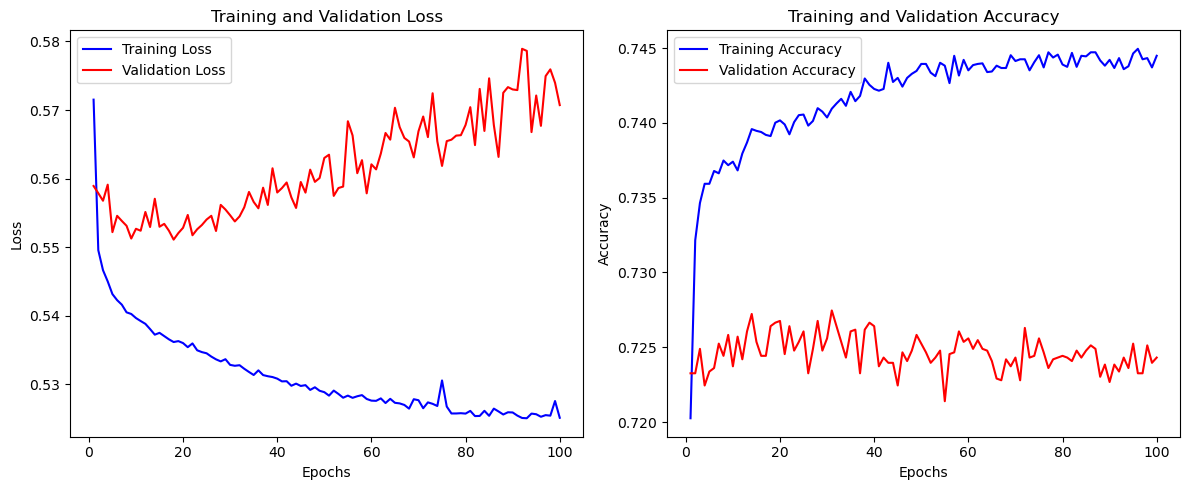

In [12]:
import matplotlib.pyplot as plt

# Get training and validation loss and accuracy from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plotting
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

